In [1]:
# encoding = 'utf-8'

In [2]:
import pandas as pd

data = pd.read_csv('behavior.csv', header=0, encoding='utf-8')

In [3]:
data.head()

,user_id,item_id,behavior_type,item_category,time,hour
0,3818035,769273,1,35830,2022/5/22,2
1,4044659,210740,1,5987,2022/5/22,23
2,3846307,701988,1,570,2022/5/22,17
3,4225075,696487,1,46141,2022/5/22,21
4,3668163,203207,1,1273,2022/5/22,6


In [4]:
data.shape

(199790, 6)

In [ ]:
# 1是点击、2是收藏、3是加购、4是购买

# 2.1 分析用户行为的漏斗模型：获客+转化+留存+变现

In [5]:
# 输出日新增用户图+用户行为漏斗图+新用户留存数量表格+新用户留存率+用户复购统计分布图 

2.1.1 输出日新增用户图

In [14]:
user_first_login_data = data.groupby('user_id')['time'].min().reset_index()

In [15]:
user_first_login_data.head()

,user_id,time
0,3443267,2022/5/26
1,3443283,2022/5/28
2,3443299,2022/5/28
3,3443315,2022/5/26
4,3443331,2022/5/24


Text(0.5, 1.0, '不同时间内新增用户数')

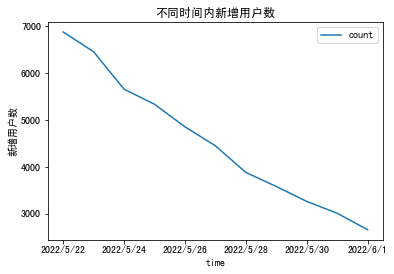

In [20]:
import matplotlib.pyplot as plt

user_first_login_data_date_count = user_first_login_data.groupby('time').count()
user_first_login_data_date_count.columns = ['count']
user_first_login_data_date_count.plot()
plt.ylabel('新增用户数')
plt.title('不同时间内新增用户数')

2.1.2 用户行为漏斗图

In [24]:
data.head()

,user_id,item_id,behavior_type,item_category,time,hour
0,3818035,769273,1,35830,2022/5/22,2
1,4044659,210740,1,5987,2022/5/22,23
2,3846307,701988,1,570,2022/5/22,17
3,4225075,696487,1,46141,2022/5/22,21
4,3668163,203207,1,1273,2022/5/22,6


In [26]:
data['user_id_item_id'] = data['user_id'].astype(str) + "_" + data['item_id'].astype(str)

In [29]:
len(list(set(list(data['user_id_item_id']))))

80000

In [36]:
# 1是点击、2是收藏、3是加购、4是购买

click_df = data[data['behavior_type']==1][['user_id','item_id']].drop_duplicates()
click_df['点击'] = 1
collection_df = data[data['behavior_type']==2][['user_id','item_id']].drop_duplicates()
collection_df['收藏'] = 1
repurchase_df = data[data['behavior_type']==3][['user_id','item_id']].drop_duplicates()
repurchase_df['加购'] = 1
purchase_df = data[data['behavior_type']==4][['user_id','item_id']].drop_duplicates()
purchase_df['购买'] = 1

In [43]:
click_collect = pd.merge(click_df, collection_df, on=['user_id', 'item_id'], how='outer').fillna(0)
click_collect_repurchase = pd.merge(click_collect, repurchase_df, on=['user_id', 'item_id'], how='outer').fillna(0)
click_collect_repurchase_purchase = pd.merge(click_collect_repurchase, purchase_df, on=['user_id', 'item_id'], how='outer').fillna(0)
for feature_name in list(click_collect_repurchase_purchase.columns):
    click_collect_repurchase_purchase[feature_name] = click_collect_repurchase_purchase[feature_name].apply(lambda x:int(x))


In [46]:
click_collect_repurchase_purchase

,user_id,item_id,点击,收藏,加购,购买
0,3818035,769273,1,0,0,0
1,4044659,210740,1,0,1,1
2,3846307,701988,1,0,0,0
3,4225075,696487,1,0,0,0
4,3668163,203207,1,1,1,1
...,...,...,...,...,...,...
79995,4043923,39172,1,1,1,1
79996,3654339,472436,1,1,1,1
79997,4126611,98595,1,1,1,1
79998,3681907,120525,1,1,1,0


In [55]:
# 点击
click_user_count = len(click_collect_repurchase_purchase.点击==1)

# 点击、购买
click_purchase_count = len(click_collect_repurchase_purchase[(click_collect_repurchase_purchase['点击']==1) & (click_collect_repurchase_purchase['加购']==0) & (click_collect_repurchase_purchase['收藏']==0) & (click_collect_repurchase_purchase['购买']==1)])

# 点击、加入购物车
click_repurchase_count = len(click_collect_repurchase_purchase[(click_collect_repurchase_purchase['点击']==1) & (click_collect_repurchase_purchase['加购']==1) & (click_collect_repurchase_purchase['收藏']==0)])

# 点击、加入购物车、购买
click_repurchase_purchase_count = len(click_collect_repurchase_purchase[(click_collect_repurchase_purchase['点击']==1) & (click_collect_repurchase_purchase['加购']==1) & (click_collect_repurchase_purchase['购买']==1)])

# 点击、收藏
click_collect_count = len(click_collect_repurchase_purchase[(click_collect_repurchase_purchase['点击']==1) & (click_collect_repurchase_purchase['加购']==0) & (click_collect_repurchase_purchase['收藏']==1)])

# 点击、收藏、购买
click_collect_purchase_count = len(click_collect_repurchase_purchase[(click_collect_repurchase_purchase['点击']==1) & (click_collect_repurchase_purchase['加购']==0) & (click_collect_repurchase_purchase['收藏']==1) & (click_collect_repurchase_purchase['购买']==1)])

# 点击、收藏、加入购物车
click_collect_repurchase_count = len(click_collect_repurchase_purchase[(click_collect_repurchase_purchase['点击']==1) & (click_collect_repurchase_purchase['加购']==1) & (click_collect_repurchase_purchase['收藏']==1)])

# 点击、收藏、加入购物车、购买
click_collect_repurchase_purchase_count = len(click_collect_repurchase_purchase[(click_collect_repurchase_purchase['点击']==1) & (click_collect_repurchase_purchase['加购']==1) & (click_collect_repurchase_purchase['收藏']==1) & (click_collect_repurchase_purchase['购买']==1)])


In [62]:
print("点击->购买转化率(%):", round(click_purchase_count/click_user_count,5))
print("点击->加购转化率(%):", round(click_repurchase_count/click_user_count,5))
print("点击->收藏转化率(%):", round(click_collect_count/click_user_count,5))
print("收藏->加购转化率(%):", round(click_collect_repurchase_count/click_collect_count,5))
print("收藏->购买转化率(%):", round(click_collect_purchase_count/click_collect_count,5))
print("点击->收藏->购买转化率(%):", round(click_collect_purchase_count/click_collect_count,5))

点击->购买转化率(%): 0.12734
点击->加购转化率(%): 0.2829
点击->收藏转化率(%): 0.03372
收藏->加购转化率(%): 5.43736
收藏->购买转化率(%): 0.72202
点击->收藏->购买转化率(%): 0.72202


2.1.3 新用户留存数量表格

In [67]:
user_first_login_data_1 = user_first_login_data
user_first_login_data_1.columns = ['user_id', 'first_date']
user_first_login_data_1['first_date'] = pd.to_datetime(user_first_login_data_1['first_date'],format='%Y-%m-%d')
user_first_login_data_1.head()

,user_id,first_date
0,3443267,2022-05-26
1,3443283,2022-05-28
2,3443299,2022-05-28
3,3443315,2022-05-26
4,3443331,2022-05-24


In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
user_login_data = data[['user_id','time']]
user_login_data.columns = ['user_id', 'login_date']
user_login_data['login_date'] = pd.to_datetime(user_login_data['login_date'],format='%Y-%m-%d')
user_login_data.head()

,user_id,login_date
0,3818035,2022-05-22
1,4044659,2022-05-22
2,3846307,2022-05-22
3,4225075,2022-05-22
4,3668163,2022-05-22


In [74]:
user_first_login_data = pd.merge(user_first_login_data_1, user_login_data, on=['user_id'])

In [75]:
user_first_login_data

,user_id,first_date,login_date
0,3443267,2022-05-26,2022-05-26
1,3443267,2022-05-26,2022-05-26
2,3443267,2022-05-26,2022-05-26
3,3443283,2022-05-28,2022-05-28
4,3443283,2022-05-28,2022-05-28
...,...,...,...
199785,4243251,2022-05-23,2022-05-23
199786,4243251,2022-05-23,2022-05-29
199787,4243251,2022-05-23,2022-05-23
199788,4243251,2022-05-23,2022-05-23


In [76]:
user_first_login_data['day_diff'] = user_first_login_data['login_date'] - user_first_login_data['first_date']

In [77]:
user_first_login_data

,user_id,first_date,login_date,day_diff
0,3443267,2022-05-26,2022-05-26,0 days
1,3443267,2022-05-26,2022-05-26,0 days
2,3443267,2022-05-26,2022-05-26,0 days
3,3443283,2022-05-28,2022-05-28,0 days
4,3443283,2022-05-28,2022-05-28,0 days
...,...,...,...,...
199785,4243251,2022-05-23,2022-05-23,0 days
199786,4243251,2022-05-23,2022-05-29,6 days
199787,4243251,2022-05-23,2022-05-23,0 days
199788,4243251,2022-05-23,2022-05-23,0 days


In [87]:
user_first_login_data['day_diff'] = user_first_login_data['day_diff'].apply(lambda x:int(str(x).split(' ')[0]))

In [99]:
day_0 = user_first_login_data[user_first_login_data['day_diff']==0]
day_1 = user_first_login_data[user_first_login_data['day_diff']==1]
day_3 = user_first_login_data[user_first_login_data['day_diff']==2]
day_7 = user_first_login_data[user_first_login_data['day_diff']==6]

In [110]:
df_0 = day_0.groupby('first_date').count().reset_index()[['first_date','day_diff']].rename(columns={'day_diff':'当日新增用户数'})
df_1 = day_1.groupby('first_date')['day_diff'].sum().reset_index().rename(columns={'day_diff':'次日留存数'})
df_3 = day_3.groupby('first_date')['day_diff'].sum().reset_index().rename(columns={'day_diff':'3日留存数'})
df_7 = day_7.groupby('first_date')['day_diff'].sum().reset_index().rename(columns={'day_diff':'7日留存数'})

In [116]:
df_01 = pd.merge(df_0, df_1, on=['first_date'], how='outer')
df_03 = pd.merge(df_01, df_3, on=['first_date'], how='outer').fillna(0)
df_07 = pd.merge(df_03, df_7, on=['first_date'], how='outer').fillna(0)
df_07

,first_date,当日新增用户数,次日留存数,3日留存数,7日留存数
0,2022-05-22,17824,1160.0,2506.0,7032.0
1,2022-05-23,17175,1244.0,2250.0,6642.0
2,2022-05-24,15201,1018.0,2146.0,6324.0
3,2022-05-25,15032,958.0,2050.0,5580.0
4,2022-05-26,13784,1035.0,1884.0,5442.0
5,2022-05-27,12971,938.0,1664.0,0.0
6,2022-05-28,11583,801.0,1586.0,0.0
7,2022-05-29,11105,779.0,1460.0,0.0
8,2022-05-30,10453,653.0,1432.0,0.0
9,2022-05-31,9980,679.0,0.0,0.0


In [117]:
df_01 = pd.merge(df_0, df_1, on=['first_date'])
df_03 = pd.merge(df_01, df_3, on=['first_date'])
df_07 = pd.merge(df_03, df_7, on=['first_date'])
df_07

,first_date,当日新增用户数,次日留存数,3日留存数,7日留存数
0,2022-05-22,17824,1160,2506,7032
1,2022-05-23,17175,1244,2250,6642
2,2022-05-24,15201,1018,2146,6324
3,2022-05-25,15032,958,2050,5580
4,2022-05-26,13784,1035,1884,5442


2.1.4 新用户留存率

In [119]:
df_07['次日留存率'] = df_07['次日留存数']/df_07['当日新增用户数'] * 100
df_07['3日留存率'] = df_07['3日留存数']/df_07['当日新增用户数'] * 100
df_07['7日留存率'] = df_07['7日留存数']/df_07['当日新增用户数'] * 100
df_07[['first_date','当日新增用户数','次日留存率','3日留存率','7日留存率']]

,first_date,当日新增用户数,次日留存率,3日留存率,7日留存率
0,2022-05-22,17824,6.508079,14.059695,39.452424
1,2022-05-23,17175,7.243086,13.100437,38.672489
2,2022-05-24,15201,6.696928,14.117492,41.602526
3,2022-05-25,15032,6.373071,13.637573,37.120809
4,2022-05-26,13784,7.508706,13.668021,39.480557


2.1.5 用户复购统计分布图 

In [120]:
data.head()

,user_id,item_id,behavior_type,item_category,time,hour,user_id_item_id
0,3818035,769273,1,35830,2022/5/22,2,3818035_769273
1,4044659,210740,1,5987,2022/5/22,23,4044659_210740
2,3846307,701988,1,570,2022/5/22,17,3846307_701988
3,4225075,696487,1,46141,2022/5/22,21,4225075_696487
4,3668163,203207,1,1273,2022/5/22,6,3668163_203207


In [ ]:
# 1是点击、2是收藏、3是加购、4是购买

In [122]:
purchase = data[data['behavior_type']==4]

In [131]:
purchase_df = purchase.groupby('user_id').count().reset_index()[['user_id','item_id']].rename(columns={'item_id':'用户购买次数'})
purchase_count_df = purchase_df.groupby('用户购买次数').count().reset_index().rename(columns={'user_id':'购买该次数人数'})
purchase_count_df['不同购买次数占比'] = purchase_count_df['购买该次数人数']/len(purchase_df) *100

In [132]:
purchase_count_df

,用户购买次数,购买该次数人数,不同购买次数占比
0,1,35312,94.120156
1,2,2140,5.703929
2,3,66,0.175916


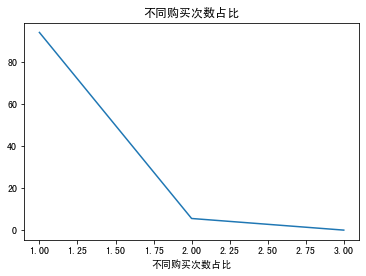

In [134]:
plt.plot(purchase_count_df.用户购买次数, purchase_count_df.不同购买次数占比)
plt.xlabel('不同购买次数占比')
plt.title('不同购买次数占比')
plt.show()

# 2.2 按照不同时间尺度分析用户行为

2.2.1围绕点击数、收藏数、加购数、购买数对用户以日为单位进行分析，输出折线图 

In [135]:
data.head()

,user_id,item_id,behavior_type,item_category,time,hour,user_id_item_id
0,3818035,769273,1,35830,2022/5/22,2,3818035_769273
1,4044659,210740,1,5987,2022/5/22,23,4044659_210740
2,3846307,701988,1,570,2022/5/22,17,3846307_701988
3,4225075,696487,1,46141,2022/5/22,21,4225075_696487
4,3668163,203207,1,1273,2022/5/22,6,3668163_203207


In [147]:
click_data = data[data['behavior_type']==1].groupby('time').count()[['user_id']].rename(columns={'user_id':'点击数量'}).reset_index()
collect_data = data[data['behavior_type']==2].groupby('time').count()[['user_id']].rename(columns={'user_id':'收藏数量'}).reset_index()
repurchase_data = data[data['behavior_type']==3].groupby('time').count()[['user_id']].rename(columns={'user_id':'加购数量'}).reset_index()
purchase_data = data[data['behavior_type']==4].groupby('time').count()[['user_id']].rename(columns={'user_id':'购买数量'}).reset_index()


In [148]:
click_collect = pd.merge(click_data, collect_data, on=['time'])
click_repurchase = pd.merge(click_collect, repurchase_data, on=['time'])
click_purchase = pd.merge(click_repurchase, purchase_data, on=['time'])

In [149]:
click_purchase

,time,点击数量,收藏数量,加购数量,购买数量
0,2022/5/22,7186,1660,5446,3532
1,2022/5/23,7320,1970,5380,3665
2,2022/5/24,7106,1157,5917,3518
3,2022/5/25,7359,1477,5933,3766
4,2022/5/26,7341,1426,5870,3615
5,2022/5/27,7372,2148,5232,3650
6,2022/5/28,7224,1840,5260,3499
7,2022/5/29,7213,1951,5275,3616
8,2022/5/30,7256,1120,6216,3622
9,2022/5/31,7293,2127,5261,3629


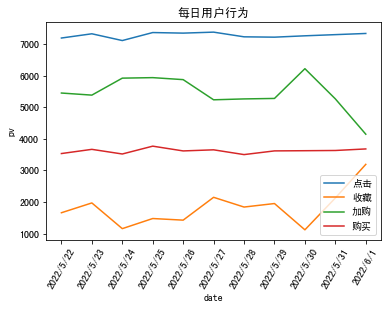

In [152]:
plt.plot(list(click_purchase['time']), list(click_purchase['点击数量']), label='点击')
plt.plot(list(click_purchase['time']), list(click_purchase['收藏数量']), label='收藏')
plt.plot(list(click_purchase['time']), list(click_purchase['加购数量']), label='加购')
plt.plot(list(click_purchase['time']), list(click_purchase['购买数量']), label='购买')

plt.legend()
plt.xlabel('date')
plt.xticks(rotation=60)
plt.ylabel('pv')
plt.title('每日用户行为')
plt.show()

2.2.2 以小时为单位，分析当日在不同小时的用户行为，输出折线图 

In [153]:
data.head()

,user_id,item_id,behavior_type,item_category,time,hour,user_id_item_id
0,3818035,769273,1,35830,2022/5/22,2,3818035_769273
1,4044659,210740,1,5987,2022/5/22,23,4044659_210740
2,3846307,701988,1,570,2022/5/22,17,3846307_701988
3,4225075,696487,1,46141,2022/5/22,21,4225075_696487
4,3668163,203207,1,1273,2022/5/22,6,3668163_203207


In [155]:
click_data_hour = data[data['behavior_type']==1].groupby('hour').count()[['user_id']].rename(columns={'user_id':'点击数量'}).reset_index()
collect_data_hour = data[data['behavior_type']==2].groupby('hour').count()[['user_id']].rename(columns={'user_id':'收藏数量'}).reset_index()
repurchase_data_hour = data[data['behavior_type']==3].groupby('hour').count()[['user_id']].rename(columns={'user_id':'加购数量'}).reset_index()
purchase_data_hour = data[data['behavior_type']==4].groupby('hour').count()[['user_id']].rename(columns={'user_id':'购买数量'}).reset_index()

click_collect_hour = pd.merge(click_data_hour, collect_data_hour, on=['hour'])
click_repurchase_hour = pd.merge(click_collect_hour, repurchase_data_hour, on=['hour'])
click_purchase_hour = pd.merge(click_repurchase_hour, purchase_data_hour, on=['hour'])

click_purchase_hour


,hour,点击数量,收藏数量,加购数量,购买数量
0,0,4344,1019,3217,2139
1,1,3459,855,2577,1660
2,2,2787,703,2157,1425
3,3,2114,548,1586,1037
4,4,1495,409,1121,755
5,5,1128,287,875,559
6,6,903,216,626,428
7,7,728,188,582,390
8,8,756,182,562,387
9,9,824,203,593,417


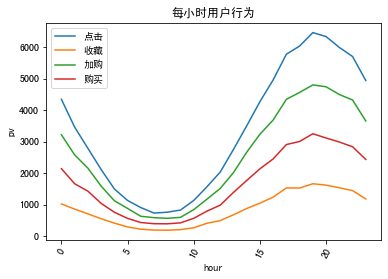

In [158]:
plt.plot(list(click_purchase_hour['hour']), list(click_purchase_hour['点击数量']), label='点击')
plt.plot(list(click_purchase_hour['hour']), list(click_purchase_hour['收藏数量']), label='收藏')
plt.plot(list(click_purchase_hour['hour']), list(click_purchase_hour['加购数量']), label='加购')
plt.plot(list(click_purchase_hour['hour']), list(click_purchase_hour['购买数量']), label='购买')

plt.legend()
plt.xlabel('hour')
plt.xticks(rotation=60)
plt.ylabel('pv')
plt.title('每小时用户行为')
plt.show()

# 2.3 使用RMF模型，制作用户价值分层 

In [159]:
# 计算消费间隔R值

In [160]:
data.head()

,user_id,item_id,behavior_type,item_category,time,hour,user_id_item_id
0,3818035,769273,1,35830,2022/5/22,2,3818035_769273
1,4044659,210740,1,5987,2022/5/22,23,4044659_210740
2,3846307,701988,1,570,2022/5/22,17,3846307_701988
3,4225075,696487,1,46141,2022/5/22,21,4225075_696487
4,3668163,203207,1,1273,2022/5/22,6,3668163_203207


In [ ]:
# 1是点击、2是收藏、3是加购、4是购买

In [161]:
purchase_1 = data[data['behavior_type']==4]

In [167]:
last_login_date = purchase_1.groupby('user_id')['time'].max().reset_index().rename(columns={'time':'最近一次购买日期'})

In [168]:
last_login_date 

,user_id,最近一次购买日期
0,3443267,2022/5/26
1,3443283,2022/5/28
2,3443299,2022/5/28
3,3443315,2022/5/30
4,3443331,2022/5/24
...,...,...
37513,4243171,2022/5/24
37514,4243187,2022/5/29
37515,4243203,2022/5/28
37516,4243235,2022/5/24


In [176]:
def get_rfm_r(input_date, max_date='2022-06-01'):
    import datetime
    
    date1 = datetime.datetime.strptime(max_date,"%Y-%m-%d")
    date2 = datetime.datetime.strptime(input_date,"%Y/%m/%d")
    num =(date1-date2).days
    
    if num >=0 and num < 2:
        return 4
    elif num >= 2 and num < 4:
        return 3
    elif num >= 4 and num < 6:
        return 2
    else:
        return 1

In [178]:
last_login_date['rfm_R'] = last_login_date['最近一次购买日期'].apply(lambda x:get_rfm_r(x))

In [179]:
last_login_date.head()

,user_id,最近一次购买日期,rfm_R
0,3443267,2022/5/26,1
1,3443283,2022/5/28,2
2,3443299,2022/5/28,2
3,3443315,2022/5/30,3
4,3443331,2022/5/24,1


In [181]:
last_login_date['rfm_R'].mean()

2.1243936243936243

In [187]:
# 计算消费频率F值

def get_rfm_F(count):
    if count >=1 and count < 2:
        return 4
    elif count >= 2 and count < 4:
        return 3
    elif count >= 4 and count < 8:
        return 2
    else:
        return 1

In [188]:
rmf_F_df = purchase_1.groupby('user_id').count().reset_index()[['user_id','item_id']].rename(columns={'item_id':'消费次数'})
rmf_F_df['rfm_F'] = rmf_F_df['消费次数'].apply(lambda x:get_rfm_F(x))
rmf_F_df

,user_id,消费次数,rfm_F
0,3443267,1,4
1,3443283,1,4
2,3443299,1,4
3,3443315,1,4
4,3443331,1,4
...,...,...,...
37513,4243171,1,4
37514,4243187,1,4
37515,4243203,1,4
37516,4243235,2,3


In [190]:
rmf_F_df[['rfm_F']].mean()

rfm_F    3.941202
dtype: float64

In [192]:
RMF_RF = pd.merge(rmf_F_df,last_login_date,on=['user_id'])
RMF_RF_1 = RMF_RF[(RMF_RF['rfm_R'] >= 2.124) & (RMF_RF['rfm_F'] >= 3.94)]
RMF_RF_2 = RMF_RF[(RMF_RF['rfm_R'] >= 2.124) & (RMF_RF['rfm_F'] < 3.94)]
RMF_RF_3 = RMF_RF[(RMF_RF['rfm_R'] < 2.124) & (RMF_RF['rfm_F'] >= 3.94)]
RMF_RF_4 = RMF_RF[(RMF_RF['rfm_R'] < 2.124) & (RMF_RF['rfm_F'] < 3.94)]

In [201]:
df = pd.DataFrame([len(RMF_RF_1),len(RMF_RF_2),len(RMF_RF_3),len(RMF_RF_4)])
df.columns = ['用户个数']
df['用户分类'] = pd.DataFrame(['重要价值用户','重要发展用户','重要保持用户','重要挽留用户'])
df[['用户分类', '用户个数']]

,用户分类,用户个数
0,重要价值用户,12920
1,重要发展用户,1216
2,重要保持用户,22392
3,重要挽留用户,990


Text(0.5, 1.0, '用户分类')

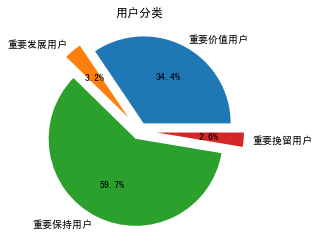

In [205]:
X = [12920,1216,22392,990]
labels = ['重要价值用户','重要发展用户','重要保持用户','重要挽留用户']
plt.pie(X,labels=labels,explode=[0.1,0.2,0.1,0.2],autopct='%1.1f%%')
plt.title('用户分类')

2.4 按照商品购买次数/商品浏览量/商品收藏量/商品加购量，分别制作统计图

In [206]:
data.head()

,user_id,item_id,behavior_type,item_category,time,hour,user_id_item_id
0,3818035,769273,1,35830,2022/5/22,2,3818035_769273
1,4044659,210740,1,5987,2022/5/22,23,4044659_210740
2,3846307,701988,1,570,2022/5/22,17,3846307_701988
3,4225075,696487,1,46141,2022/5/22,21,4225075_696487
4,3668163,203207,1,1273,2022/5/22,6,3668163_203207


In [ ]:
# 1是点击、2是收藏、3是加购、4是购买

In [225]:
# 点击

In [213]:
item_click_data = data[data['behavior_type'] == 1].groupby('item_id').count().reset_index()[['item_id','user_id']].rename(columns={'user_id':'count'})
item_click_data.sort_values(by='count',ascending=False)

,item_id,count
46979,474495,4
58050,582104,4
20254,214053,4
11336,119624,4
42448,446073,4
...,...,...
25948,273436,1
25947,273415,1
25946,273411,1
25945,273406,1


Text(0.5, 0, '商品点击次数')

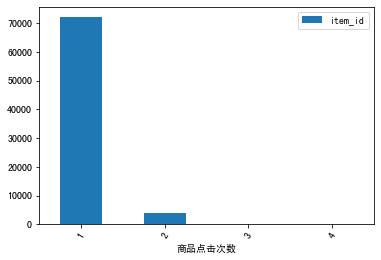

In [224]:
item_click_data.groupby('count').count().plot.bar()
plt.xticks(rotation=60)
plt.xlabel('商品点击次数')

In [226]:
# 收藏

item_collect_data = data[data['behavior_type'] == 2].groupby('item_id').count().reset_index()[['item_id','user_id']].rename(columns={'user_id':'count'})
item_collect_data.sort_values(by='count',ascending=False)


,item_id,count
5423,158691,4
12571,367045,4
13267,387494,4
15647,457255,4
2950,84702,4
...,...,...
6218,181880,1
6219,181978,1
6221,182029,1
6222,182072,1


Text(0.5, 0, '商品收藏次数')

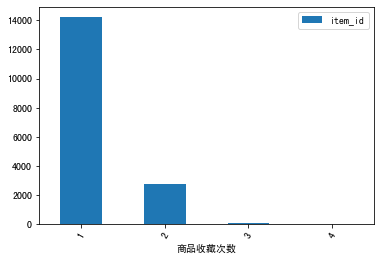

In [227]:
item_collect_data.groupby('count').count().plot.bar()
plt.xticks(rotation=60)
plt.xlabel('商品收藏次数')

In [228]:
# 加购

item_repurchase_data = data[data['behavior_type'] == 3].groupby('item_id').count().reset_index()[['item_id','user_id']].rename(columns={'user_id':'count'})
item_repurchase_data.sort_values(by='count',ascending=False)


,item_id,count
31598,440143,6
22129,308194,6
24730,343997,6
16864,236264,6
31281,435512,6
...,...,...
17313,242417,1
17312,242401,1
17311,242400,1
17300,242297,1


Text(0.5, 0, '商品加购次数')

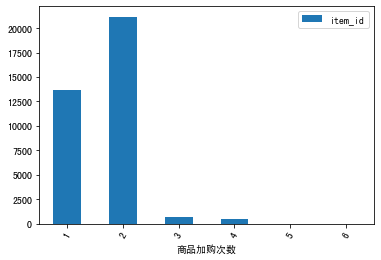

In [230]:
item_repurchase_data.groupby('count').count().plot.bar()
plt.xticks(rotation=60)
plt.xlabel('商品加购次数')

In [231]:
# 购买

item_purchase_data = data[data['behavior_type'] == 4].groupby('item_id').count().reset_index()[['item_id','user_id']].rename(columns={'user_id':'count'})
item_purchase_data.sort_values(by='count',ascending=False)


,item_id,count
12246,173008,4
31775,446073,4
22294,313541,4
22523,316529,4
15115,214053,4
...,...,...
12927,182536,1
12928,182578,1
12929,182594,1
12930,182624,1


Text(0.5, 0, '商品购买次数')

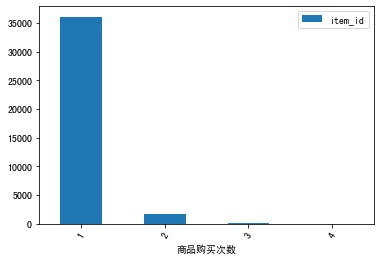

In [232]:
item_purchase_data.groupby('count').count().plot.bar()
plt.xticks(rotation=60)
plt.xlabel('商品购买次数')